In [2]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in e:\anaconda3\lib\site-packages (1.3.2)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied, skipping upgrade: scipy>=1.5.0 in e:\anaconda3\lib\site-packages (from scikit-learn) (1.5.2)



In [3]:
!pip install --upgrade numpy
!pip install scikit-learn

Requirement already up-to-date: numpy in e:\anaconda3\lib\site-packages (1.24.4)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#load the data from the csv file to pandas dataframe
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

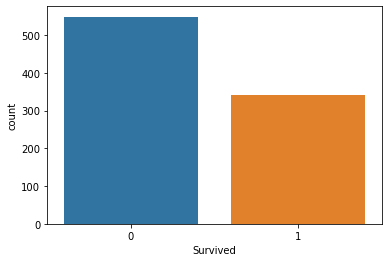

In [9]:
sns.countplot(x="Survived",data=df_train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

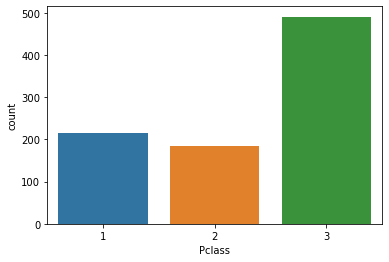

In [10]:
sns.countplot(x='Pclass',data=df_train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

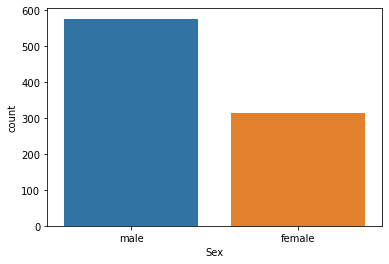

In [11]:
sns.countplot(x='Sex',data=df_train)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

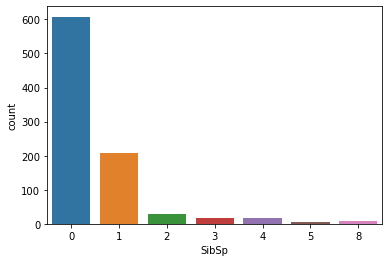

In [12]:
sns.countplot(x='SibSp',data=df_train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

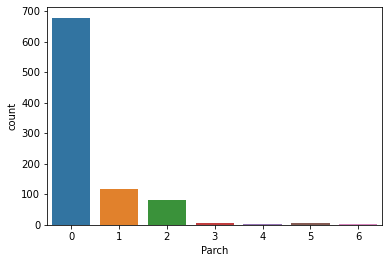

In [13]:
sns.countplot(x='Parch',data=df_train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

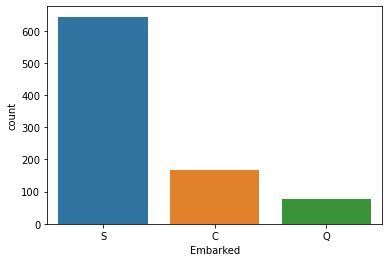

In [14]:
sns.countplot(x='Embarked',data=df_train)

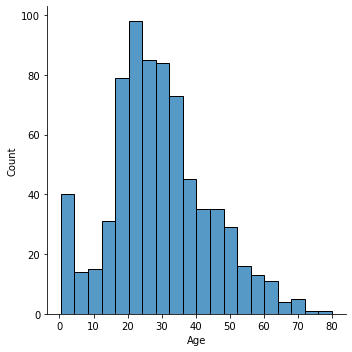

In [15]:
sns.displot(df_train['Age'])

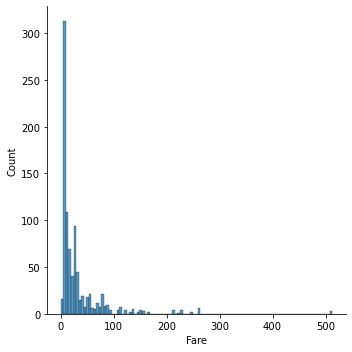

In [16]:
sns.displot(df_train['Fare'])

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


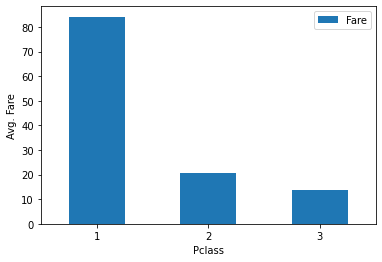

In [17]:
!pip install matplotlib.pyplot as plt
class_fare = df_train.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

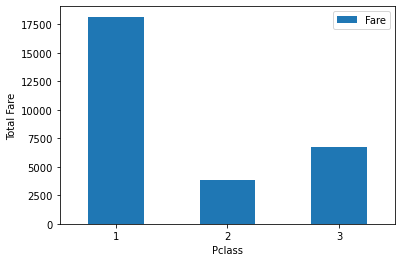

In [18]:
class_fare = df_train.pivot_table(index='Pclass',values='Fare' , aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

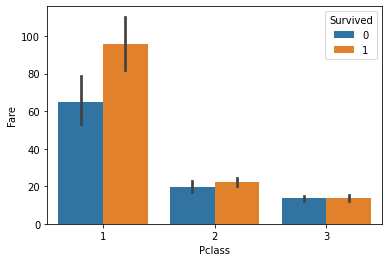

In [19]:
sns.barplot(data=df_train,x='Pclass',y='Fare',hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

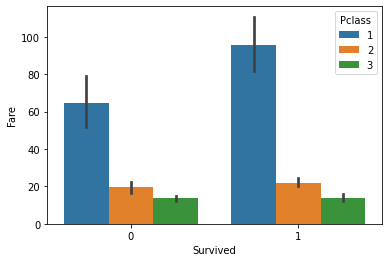

In [20]:
sns.barplot(data=df_train,x='Survived',y='Fare',hue='Pclass')

# Data Preprocessing

In [21]:
train_len = len(df_train)
df = pd.concat([df_train,df_test],axis=0)
df = df.reset_index()
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.tail()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [23]:
df.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [24]:
#drop or delete the column
df = df.drop(columns=['Cabin'], axis=1)

In [25]:
df['Age'].mean()

29.881137667304014

In [26]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())


In [27]:
df['Embarked'].mode()[0]

'S'

In [28]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## Log Transformation for uniform data distribution

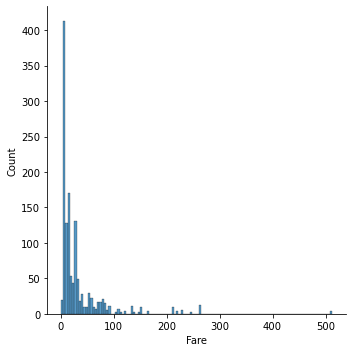

In [29]:
sns.displot(df['Fare'])

In [30]:
df['Fare'] = np.log(df['Fare']+1)

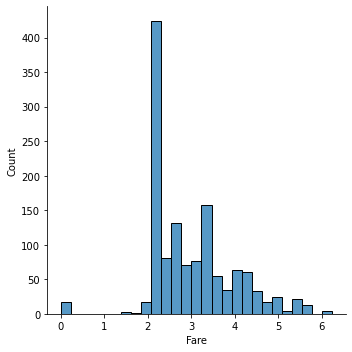

In [31]:
sns.displot(df['Fare'])

## Correlation Matrix

<AxesSubplot:>

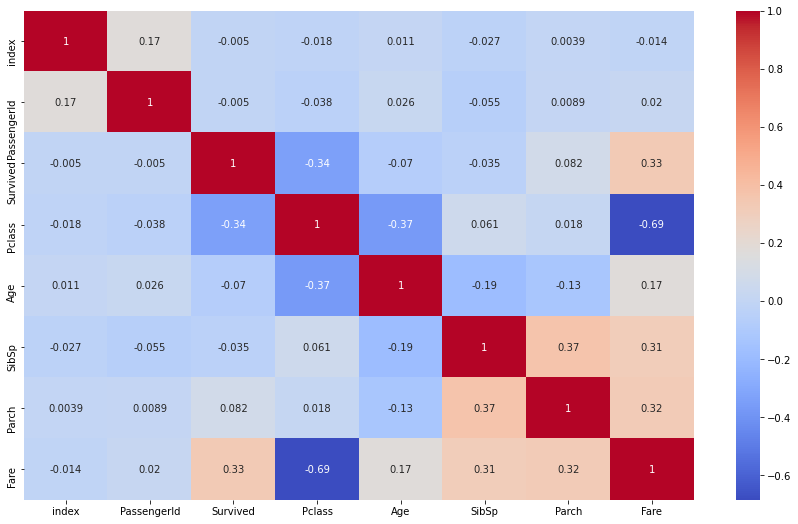

In [32]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation
corr = numeric_df.corr()
# corr = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True, cmap='coolwarm')

In [33]:
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [34]:
df = df.drop(columns=['Name','Ticket'],axis=1)
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0.0,3,male,22.0,1,0,2.110213,S
1,1,2,1.0,1,female,38.0,1,0,4.280593,C
2,2,3,1.0,3,female,26.0,0,0,2.188856,S
3,3,4,1.0,1,female,35.0,1,0,3.990834,S
4,4,5,0.0,3,male,35.0,0,0,2.202765,S


## Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
le = LabelEncoder()

for col in cols:
  df[col]=le.fit_transform(df[col])
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0.0,3,1,22.0,1,0,2.110213,2
1,1,2,1.0,1,0,38.0,1,0,4.280593,0
2,2,3,1.0,3,0,26.0,0,0,2.188856,2
3,3,4,1.0,1,0,35.0,1,0,3.990834,2
4,4,5,0.0,3,1,35.0,0,0,2.202765,2


In [36]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [37]:
train.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0.0,3,1,22.0,1,0,2.110213,2
1,1,2,1.0,1,0,38.0,1,0,4.280593,0
2,2,3,1.0,3,0,26.0,0,0,2.188856,2
3,3,4,1.0,1,0,35.0,1,0,3.990834,2
4,4,5,0.0,3,1,35.0,0,0,2.202765,2


In [38]:
test.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,0,892,NaN,3,1,34.5,0,0,2.178064,1
892,1,893,NaN,3,0,47.0,1,0,2.079442,2
893,2,894,NaN,2,1,62.0,0,0,2.369075,1
894,3,895,NaN,3,1,27.0,0,0,2.268252,2
895,4,896,NaN,3,0,22.0,1,1,2.586824,2


In [39]:
#input split
X=train.drop(columns=['PassengerId','Survived'],axis=1)
Y=train['Survived']

In [40]:
X.head()

,index,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.110213,2
1,1,1,0,38.0,1,0,4.280593,0
2,2,3,0,26.0,0,0,2.188856,2
3,3,1,0,35.0,1,0,3.990834,2
4,4,3,1,35.0,0,0,2.202765,2


## Model Training

In [41]:
from sklearn.model_selection import train_test_split,cross_val_score
#classify column
def classify(model):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
  model.fit(X_train,Y_train)
  print('Accuracy',model.score(X_test,Y_test))

  score = cross_val_score(model,X,Y)
  print('CV Score',np.mean(score))


In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy 0.7892376681614349
CV Score 0.786761659657272


In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy 0.7713004484304933
CV Score 0.7521750047078024


In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy 0.820627802690583
CV Score 0.8059318310212792


In [45]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy 0.8340807174887892
CV Score 0.8059067227418242


In [46]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy 0.8026905829596412
CV Score 0.7801707363002951


In [ ]:
!pip uninstall pandas
!pip install pandas==1.3.3
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model)

In [49]:
!pip install catboost


In [50]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
classify(model)

Learning rate set to 0.008672
0:	learn: 0.6869499	total: 259ms	remaining: 4m 18s
1:	learn: 0.6808290	total: 269ms	remaining: 2m 14s
2:	learn: 0.6749679	total: 280ms	remaining: 1m 33s
3:	learn: 0.6695994	total: 286ms	remaining: 1m 11s
4:	learn: 0.6665585	total: 319ms	remaining: 1m 3s
5:	learn: 0.6605757	total: 330ms	remaining: 54.7s
6:	learn: 0.6557230	total: 340ms	remaining: 48.3s
7:	learn: 0.6508616	total: 344ms	remaining: 42.7s
8:	learn: 0.6457803	total: 348ms	remaining: 38.4s
9:	learn: 0.6406170	total: 353ms	remaining: 34.9s
10:	learn: 0.6353510	total: 357ms	remaining: 32.1s
11:	learn: 0.6309494	total: 361ms	remaining: 29.7s
12:	learn: 0.6262368	total: 365ms	remaining: 27.7s
13:	learn: 0.6213372	total: 369ms	remaining: 26s
14:	learn: 0.6174703	total: 372ms	remaining: 24.4s
15:	learn: 0.6132774	total: 375ms	remaining: 23.1s
16:	learn: 0.6086035	total: 379ms	remaining: 21.9s
17:	learn: 0.6060849	total: 381ms	remaining: 20.8s
18:	learn: 0.6019465	total: 385ms	remaining: 19.9s
19:	learn

180:	learn: 0.3834177	total: 908ms	remaining: 4.11s
181:	learn: 0.3829928	total: 912ms	remaining: 4.1s
182:	learn: 0.3825317	total: 915ms	remaining: 4.08s
183:	learn: 0.3820662	total: 918ms	remaining: 4.07s
184:	learn: 0.3817841	total: 921ms	remaining: 4.06s
185:	learn: 0.3813940	total: 924ms	remaining: 4.04s
186:	learn: 0.3809740	total: 928ms	remaining: 4.03s
187:	learn: 0.3805296	total: 932ms	remaining: 4.02s
188:	learn: 0.3800998	total: 935ms	remaining: 4.01s
189:	learn: 0.3797180	total: 938ms	remaining: 4s
190:	learn: 0.3794145	total: 941ms	remaining: 3.98s
191:	learn: 0.3790185	total: 945ms	remaining: 3.98s
192:	learn: 0.3785616	total: 948ms	remaining: 3.96s
193:	learn: 0.3779953	total: 951ms	remaining: 3.95s
194:	learn: 0.3775838	total: 954ms	remaining: 3.94s
195:	learn: 0.3772147	total: 957ms	remaining: 3.93s
196:	learn: 0.3768589	total: 961ms	remaining: 3.92s
197:	learn: 0.3766107	total: 964ms	remaining: 3.9s
198:	learn: 0.3762377	total: 967ms	remaining: 3.89s
199:	learn: 0.375

382:	learn: 0.3330401	total: 1.55s	remaining: 2.5s
383:	learn: 0.3329280	total: 1.55s	remaining: 2.5s
384:	learn: 0.3326801	total: 1.56s	remaining: 2.49s
385:	learn: 0.3325715	total: 1.56s	remaining: 2.48s
386:	learn: 0.3324048	total: 1.56s	remaining: 2.48s
387:	learn: 0.3322811	total: 1.57s	remaining: 2.47s
388:	learn: 0.3319660	total: 1.57s	remaining: 2.47s
389:	learn: 0.3318598	total: 1.57s	remaining: 2.46s
390:	learn: 0.3316611	total: 1.58s	remaining: 2.46s
391:	learn: 0.3315826	total: 1.58s	remaining: 2.45s
392:	learn: 0.3314534	total: 1.58s	remaining: 2.45s
393:	learn: 0.3312090	total: 1.59s	remaining: 2.44s
394:	learn: 0.3311059	total: 1.59s	remaining: 2.44s
395:	learn: 0.3308945	total: 1.59s	remaining: 2.43s
396:	learn: 0.3307938	total: 1.6s	remaining: 2.43s
397:	learn: 0.3306543	total: 1.6s	remaining: 2.42s
398:	learn: 0.3303984	total: 1.6s	remaining: 2.42s
399:	learn: 0.3301924	total: 1.61s	remaining: 2.41s
400:	learn: 0.3299860	total: 1.61s	remaining: 2.4s
401:	learn: 0.3296

565:	learn: 0.3037321	total: 2.2s	remaining: 1.69s
566:	learn: 0.3034707	total: 2.21s	remaining: 1.68s
567:	learn: 0.3032391	total: 2.21s	remaining: 1.68s
568:	learn: 0.3031745	total: 2.21s	remaining: 1.68s
569:	learn: 0.3030065	total: 2.22s	remaining: 1.67s
570:	learn: 0.3029480	total: 2.22s	remaining: 1.67s
571:	learn: 0.3028674	total: 2.23s	remaining: 1.67s
572:	learn: 0.3027603	total: 2.24s	remaining: 1.67s
573:	learn: 0.3026520	total: 2.25s	remaining: 1.67s
574:	learn: 0.3024906	total: 2.25s	remaining: 1.67s
575:	learn: 0.3022557	total: 2.26s	remaining: 1.67s
576:	learn: 0.3021730	total: 2.27s	remaining: 1.66s
577:	learn: 0.3019737	total: 2.27s	remaining: 1.66s
578:	learn: 0.3019030	total: 2.28s	remaining: 1.66s
579:	learn: 0.3016877	total: 2.29s	remaining: 1.65s
580:	learn: 0.3016182	total: 2.29s	remaining: 1.65s
581:	learn: 0.3015235	total: 2.3s	remaining: 1.65s
582:	learn: 0.3013821	total: 2.3s	remaining: 1.65s
583:	learn: 0.3012336	total: 2.31s	remaining: 1.64s
584:	learn: 0.3

771:	learn: 0.2750942	total: 3s	remaining: 887ms
772:	learn: 0.2748482	total: 3.01s	remaining: 883ms
773:	learn: 0.2747374	total: 3.01s	remaining: 879ms
774:	learn: 0.2746680	total: 3.01s	remaining: 875ms
775:	learn: 0.2746092	total: 3.02s	remaining: 871ms
776:	learn: 0.2744108	total: 3.03s	remaining: 870ms
777:	learn: 0.2742758	total: 3.04s	remaining: 866ms
778:	learn: 0.2741218	total: 3.04s	remaining: 863ms
779:	learn: 0.2739928	total: 3.04s	remaining: 859ms
780:	learn: 0.2739000	total: 3.05s	remaining: 855ms
781:	learn: 0.2738472	total: 3.05s	remaining: 851ms
782:	learn: 0.2737279	total: 3.06s	remaining: 847ms
783:	learn: 0.2736286	total: 3.06s	remaining: 843ms
784:	learn: 0.2733764	total: 3.06s	remaining: 839ms
785:	learn: 0.2733465	total: 3.06s	remaining: 835ms
786:	learn: 0.2732378	total: 3.07s	remaining: 831ms
787:	learn: 0.2731295	total: 3.07s	remaining: 826ms
788:	learn: 0.2728717	total: 3.07s	remaining: 822ms
789:	learn: 0.2728150	total: 3.08s	remaining: 818ms
790:	learn: 0.2

966:	learn: 0.2462222	total: 3.65s	remaining: 125ms
967:	learn: 0.2461272	total: 3.65s	remaining: 121ms
968:	learn: 0.2460537	total: 3.66s	remaining: 117ms
969:	learn: 0.2458388	total: 3.66s	remaining: 113ms
970:	learn: 0.2458005	total: 3.66s	remaining: 109ms
971:	learn: 0.2456109	total: 3.67s	remaining: 106ms
972:	learn: 0.2454746	total: 3.67s	remaining: 102ms
973:	learn: 0.2453504	total: 3.67s	remaining: 98.1ms
974:	learn: 0.2452404	total: 3.68s	remaining: 94.3ms
975:	learn: 0.2450873	total: 3.68s	remaining: 90.5ms
976:	learn: 0.2450394	total: 3.69s	remaining: 86.8ms
977:	learn: 0.2449349	total: 3.69s	remaining: 83ms
978:	learn: 0.2448162	total: 3.69s	remaining: 79.2ms
979:	learn: 0.2447558	total: 3.69s	remaining: 75.4ms
980:	learn: 0.2445415	total: 3.7s	remaining: 71.6ms
981:	learn: 0.2444583	total: 3.7s	remaining: 67.8ms
982:	learn: 0.2441605	total: 3.7s	remaining: 64.1ms
983:	learn: 0.2440630	total: 3.71s	remaining: 60.3ms
984:	learn: 0.2439237	total: 3.71s	remaining: 56.5ms
985:	

164:	learn: 0.3865556	total: 625ms	remaining: 3.16s
165:	learn: 0.3861109	total: 628ms	remaining: 3.16s
166:	learn: 0.3854812	total: 633ms	remaining: 3.15s
167:	learn: 0.3850279	total: 637ms	remaining: 3.15s
168:	learn: 0.3844809	total: 640ms	remaining: 3.15s
169:	learn: 0.3840198	total: 644ms	remaining: 3.14s
170:	learn: 0.3836108	total: 653ms	remaining: 3.17s
171:	learn: 0.3830788	total: 657ms	remaining: 3.16s
172:	learn: 0.3825742	total: 663ms	remaining: 3.17s
173:	learn: 0.3819418	total: 671ms	remaining: 3.19s
174:	learn: 0.3813817	total: 674ms	remaining: 3.18s
175:	learn: 0.3811178	total: 685ms	remaining: 3.21s
176:	learn: 0.3805992	total: 689ms	remaining: 3.2s
177:	learn: 0.3803317	total: 693ms	remaining: 3.2s
178:	learn: 0.3801648	total: 699ms	remaining: 3.2s
179:	learn: 0.3797574	total: 702ms	remaining: 3.2s
180:	learn: 0.3793069	total: 705ms	remaining: 3.19s
181:	learn: 0.3789627	total: 712ms	remaining: 3.2s
182:	learn: 0.3785204	total: 715ms	remaining: 3.19s
183:	learn: 0.378

343:	learn: 0.3373286	total: 1.43s	remaining: 2.72s
344:	learn: 0.3370239	total: 1.43s	remaining: 2.72s
345:	learn: 0.3369640	total: 1.43s	remaining: 2.71s
346:	learn: 0.3369054	total: 1.44s	remaining: 2.7s
347:	learn: 0.3368640	total: 1.44s	remaining: 2.7s
348:	learn: 0.3366145	total: 1.44s	remaining: 2.69s
349:	learn: 0.3363722	total: 1.45s	remaining: 2.69s
350:	learn: 0.3361634	total: 1.45s	remaining: 2.69s
351:	learn: 0.3360005	total: 1.46s	remaining: 2.68s
352:	learn: 0.3357899	total: 1.46s	remaining: 2.68s
353:	learn: 0.3356320	total: 1.47s	remaining: 2.68s
354:	learn: 0.3353168	total: 1.47s	remaining: 2.67s
355:	learn: 0.3351715	total: 1.47s	remaining: 2.67s
356:	learn: 0.3350731	total: 1.48s	remaining: 2.67s
357:	learn: 0.3347550	total: 1.48s	remaining: 2.66s
358:	learn: 0.3344685	total: 1.49s	remaining: 2.66s
359:	learn: 0.3342648	total: 1.49s	remaining: 2.65s
360:	learn: 0.3341166	total: 1.49s	remaining: 2.65s
361:	learn: 0.3339138	total: 1.5s	remaining: 2.64s
362:	learn: 0.3

536:	learn: 0.3038935	total: 2.07s	remaining: 1.78s
537:	learn: 0.3037878	total: 2.07s	remaining: 1.78s
538:	learn: 0.3036477	total: 2.08s	remaining: 1.77s
539:	learn: 0.3034885	total: 2.08s	remaining: 1.77s
540:	learn: 0.3033038	total: 2.08s	remaining: 1.77s
541:	learn: 0.3031965	total: 2.09s	remaining: 1.76s
542:	learn: 0.3030054	total: 2.09s	remaining: 1.76s
543:	learn: 0.3028618	total: 2.09s	remaining: 1.75s
544:	learn: 0.3026110	total: 2.1s	remaining: 1.75s
545:	learn: 0.3025192	total: 2.1s	remaining: 1.75s
546:	learn: 0.3023236	total: 2.1s	remaining: 1.74s
547:	learn: 0.3019486	total: 2.11s	remaining: 1.74s
548:	learn: 0.3017555	total: 2.11s	remaining: 1.73s
549:	learn: 0.3015978	total: 2.11s	remaining: 1.73s
550:	learn: 0.3013260	total: 2.12s	remaining: 1.73s
551:	learn: 0.3012628	total: 2.12s	remaining: 1.72s
552:	learn: 0.3009626	total: 2.12s	remaining: 1.72s
553:	learn: 0.3007618	total: 2.13s	remaining: 1.71s
554:	learn: 0.3005062	total: 2.13s	remaining: 1.71s
555:	learn: 0.3

726:	learn: 0.2750487	total: 2.72s	remaining: 1.02s
727:	learn: 0.2749149	total: 2.72s	remaining: 1.02s
728:	learn: 0.2748156	total: 2.72s	remaining: 1.01s
729:	learn: 0.2746676	total: 2.73s	remaining: 1.01s
730:	learn: 0.2744906	total: 2.73s	remaining: 1s
731:	learn: 0.2743880	total: 2.74s	remaining: 1s
732:	learn: 0.2742020	total: 2.74s	remaining: 999ms
733:	learn: 0.2740270	total: 2.75s	remaining: 995ms
734:	learn: 0.2739295	total: 2.75s	remaining: 991ms
735:	learn: 0.2738722	total: 2.75s	remaining: 987ms
736:	learn: 0.2737709	total: 2.75s	remaining: 983ms
737:	learn: 0.2737121	total: 2.76s	remaining: 979ms
738:	learn: 0.2735751	total: 2.76s	remaining: 976ms
739:	learn: 0.2735211	total: 2.77s	remaining: 972ms
740:	learn: 0.2733528	total: 2.77s	remaining: 968ms
741:	learn: 0.2732179	total: 2.77s	remaining: 964ms
742:	learn: 0.2731965	total: 2.78s	remaining: 960ms
743:	learn: 0.2731479	total: 2.78s	remaining: 956ms
744:	learn: 0.2729489	total: 2.78s	remaining: 952ms
745:	learn: 0.2728

922:	learn: 0.2481575	total: 3.36s	remaining: 280ms
923:	learn: 0.2481054	total: 3.36s	remaining: 277ms
924:	learn: 0.2480136	total: 3.37s	remaining: 273ms
925:	learn: 0.2478395	total: 3.37s	remaining: 269ms
926:	learn: 0.2476730	total: 3.37s	remaining: 266ms
927:	learn: 0.2475041	total: 3.38s	remaining: 262ms
928:	learn: 0.2474712	total: 3.38s	remaining: 259ms
929:	learn: 0.2472240	total: 3.39s	remaining: 255ms
930:	learn: 0.2469920	total: 3.39s	remaining: 251ms
931:	learn: 0.2469331	total: 3.39s	remaining: 248ms
932:	learn: 0.2468170	total: 3.4s	remaining: 244ms
933:	learn: 0.2466214	total: 3.4s	remaining: 240ms
934:	learn: 0.2464732	total: 3.4s	remaining: 237ms
935:	learn: 0.2463455	total: 3.41s	remaining: 233ms
936:	learn: 0.2463397	total: 3.41s	remaining: 229ms
937:	learn: 0.2460894	total: 3.41s	remaining: 226ms
938:	learn: 0.2459371	total: 3.42s	remaining: 222ms
939:	learn: 0.2457475	total: 3.42s	remaining: 218ms
940:	learn: 0.2456715	total: 3.42s	remaining: 215ms
941:	learn: 0.2

107:	learn: 0.4145629	total: 333ms	remaining: 2.75s
108:	learn: 0.4135033	total: 336ms	remaining: 2.75s
109:	learn: 0.4126866	total: 339ms	remaining: 2.74s
110:	learn: 0.4115751	total: 341ms	remaining: 2.73s
111:	learn: 0.4107250	total: 345ms	remaining: 2.73s
112:	learn: 0.4097260	total: 348ms	remaining: 2.73s
113:	learn: 0.4088806	total: 351ms	remaining: 2.73s
114:	learn: 0.4080921	total: 354ms	remaining: 2.73s
115:	learn: 0.4072313	total: 357ms	remaining: 2.72s
116:	learn: 0.4061725	total: 360ms	remaining: 2.72s
117:	learn: 0.4052455	total: 363ms	remaining: 2.71s
118:	learn: 0.4043477	total: 367ms	remaining: 2.72s
119:	learn: 0.4032801	total: 370ms	remaining: 2.71s
120:	learn: 0.4031854	total: 372ms	remaining: 2.7s
121:	learn: 0.4027894	total: 374ms	remaining: 2.69s
122:	learn: 0.4021768	total: 377ms	remaining: 2.69s
123:	learn: 0.4014353	total: 380ms	remaining: 2.69s
124:	learn: 0.4006000	total: 383ms	remaining: 2.68s
125:	learn: 0.3999834	total: 387ms	remaining: 2.68s
126:	learn: 0

265:	learn: 0.3384939	total: 980ms	remaining: 2.7s
266:	learn: 0.3380896	total: 984ms	remaining: 2.7s
267:	learn: 0.3379183	total: 988ms	remaining: 2.7s
268:	learn: 0.3377377	total: 992ms	remaining: 2.69s
269:	learn: 0.3374205	total: 997ms	remaining: 2.69s
270:	learn: 0.3370592	total: 1s	remaining: 2.69s
271:	learn: 0.3367339	total: 1.01s	remaining: 2.69s
272:	learn: 0.3365994	total: 1.01s	remaining: 2.7s
273:	learn: 0.3363591	total: 1.02s	remaining: 2.7s
274:	learn: 0.3360196	total: 1.02s	remaining: 2.7s
275:	learn: 0.3357379	total: 1.03s	remaining: 2.71s
276:	learn: 0.3353516	total: 1.04s	remaining: 2.71s
277:	learn: 0.3350895	total: 1.04s	remaining: 2.7s
278:	learn: 0.3346558	total: 1.05s	remaining: 2.71s
279:	learn: 0.3344666	total: 1.05s	remaining: 2.7s
280:	learn: 0.3342133	total: 1.06s	remaining: 2.7s
281:	learn: 0.3340438	total: 1.06s	remaining: 2.7s
282:	learn: 0.3337902	total: 1.06s	remaining: 2.69s
283:	learn: 0.3337547	total: 1.07s	remaining: 2.69s
284:	learn: 0.3335082	tot

436:	learn: 0.3020433	total: 1.62s	remaining: 2.08s
437:	learn: 0.3018148	total: 1.62s	remaining: 2.08s
438:	learn: 0.3015745	total: 1.63s	remaining: 2.08s
439:	learn: 0.3015128	total: 1.63s	remaining: 2.07s
440:	learn: 0.3014933	total: 1.63s	remaining: 2.07s
441:	learn: 0.3013020	total: 1.63s	remaining: 2.06s
442:	learn: 0.3011385	total: 1.64s	remaining: 2.06s
443:	learn: 0.3009526	total: 1.64s	remaining: 2.06s
444:	learn: 0.3006932	total: 1.65s	remaining: 2.05s
445:	learn: 0.3005054	total: 1.65s	remaining: 2.05s
446:	learn: 0.3004439	total: 1.65s	remaining: 2.04s
447:	learn: 0.3002934	total: 1.66s	remaining: 2.04s
448:	learn: 0.3001982	total: 1.66s	remaining: 2.04s
449:	learn: 0.3000352	total: 1.66s	remaining: 2.03s
450:	learn: 0.2999492	total: 1.67s	remaining: 2.03s
451:	learn: 0.2999061	total: 1.67s	remaining: 2.02s
452:	learn: 0.2996425	total: 1.67s	remaining: 2.02s
453:	learn: 0.2995230	total: 1.67s	remaining: 2.01s
454:	learn: 0.2993319	total: 1.68s	remaining: 2.01s
455:	learn: 

638:	learn: 0.2705790	total: 2.42s	remaining: 1.37s
639:	learn: 0.2705139	total: 2.42s	remaining: 1.36s
640:	learn: 0.2703146	total: 2.43s	remaining: 1.36s
641:	learn: 0.2701628	total: 2.43s	remaining: 1.36s
642:	learn: 0.2700269	total: 2.44s	remaining: 1.35s
643:	learn: 0.2699396	total: 2.44s	remaining: 1.35s
644:	learn: 0.2696895	total: 2.44s	remaining: 1.34s
645:	learn: 0.2696099	total: 2.44s	remaining: 1.34s
646:	learn: 0.2695993	total: 2.45s	remaining: 1.34s
647:	learn: 0.2693866	total: 2.45s	remaining: 1.33s
648:	learn: 0.2693223	total: 2.46s	remaining: 1.33s
649:	learn: 0.2692252	total: 2.46s	remaining: 1.32s
650:	learn: 0.2691089	total: 2.46s	remaining: 1.32s
651:	learn: 0.2690910	total: 2.47s	remaining: 1.32s
652:	learn: 0.2689529	total: 2.47s	remaining: 1.31s
653:	learn: 0.2687699	total: 2.47s	remaining: 1.31s
654:	learn: 0.2686898	total: 2.48s	remaining: 1.3s
655:	learn: 0.2685297	total: 2.48s	remaining: 1.3s
656:	learn: 0.2682647	total: 2.48s	remaining: 1.3s
657:	learn: 0.2

824:	learn: 0.2451615	total: 3.06s	remaining: 650ms
825:	learn: 0.2450892	total: 3.07s	remaining: 647ms
826:	learn: 0.2449834	total: 3.07s	remaining: 643ms
827:	learn: 0.2447764	total: 3.08s	remaining: 639ms
828:	learn: 0.2446508	total: 3.08s	remaining: 635ms
829:	learn: 0.2445026	total: 3.08s	remaining: 632ms
830:	learn: 0.2443745	total: 3.09s	remaining: 628ms
831:	learn: 0.2442795	total: 3.09s	remaining: 624ms
832:	learn: 0.2441315	total: 3.1s	remaining: 621ms
833:	learn: 0.2440874	total: 3.1s	remaining: 618ms
834:	learn: 0.2438246	total: 3.11s	remaining: 614ms
835:	learn: 0.2436739	total: 3.11s	remaining: 611ms
836:	learn: 0.2436025	total: 3.12s	remaining: 607ms
837:	learn: 0.2433957	total: 3.12s	remaining: 603ms
838:	learn: 0.2432826	total: 3.13s	remaining: 600ms
839:	learn: 0.2430841	total: 3.13s	remaining: 596ms
840:	learn: 0.2429828	total: 3.13s	remaining: 593ms
841:	learn: 0.2428992	total: 3.14s	remaining: 589ms
842:	learn: 0.2428095	total: 3.15s	remaining: 586ms
843:	learn: 0.

3:	learn: 0.6721051	total: 13.8ms	remaining: 3.43s
4:	learn: 0.6661854	total: 16.8ms	remaining: 3.35s
5:	learn: 0.6608288	total: 20.2ms	remaining: 3.35s
6:	learn: 0.6562000	total: 22.5ms	remaining: 3.19s
7:	learn: 0.6511750	total: 25.7ms	remaining: 3.18s
8:	learn: 0.6454237	total: 29.3ms	remaining: 3.23s
9:	learn: 0.6423440	total: 31.9ms	remaining: 3.16s
10:	learn: 0.6370772	total: 35.2ms	remaining: 3.17s
11:	learn: 0.6330442	total: 39.1ms	remaining: 3.22s
12:	learn: 0.6286058	total: 42.6ms	remaining: 3.24s
13:	learn: 0.6254863	total: 47.6ms	remaining: 3.35s
14:	learn: 0.6217787	total: 53.1ms	remaining: 3.48s
15:	learn: 0.6171719	total: 56.8ms	remaining: 3.5s
16:	learn: 0.6129440	total: 60ms	remaining: 3.47s
17:	learn: 0.6087826	total: 63.2ms	remaining: 3.45s
18:	learn: 0.6047384	total: 67.3ms	remaining: 3.48s
19:	learn: 0.6011848	total: 69.6ms	remaining: 3.41s
20:	learn: 0.5978399	total: 72.3ms	remaining: 3.37s
21:	learn: 0.5948204	total: 74.4ms	remaining: 3.31s
22:	learn: 0.5913160	t

196:	learn: 0.3812275	total: 648ms	remaining: 2.64s
197:	learn: 0.3805673	total: 651ms	remaining: 2.64s
198:	learn: 0.3801626	total: 655ms	remaining: 2.64s
199:	learn: 0.3798418	total: 659ms	remaining: 2.63s
200:	learn: 0.3797838	total: 661ms	remaining: 2.63s
201:	learn: 0.3792610	total: 664ms	remaining: 2.62s
202:	learn: 0.3788490	total: 668ms	remaining: 2.62s
203:	learn: 0.3782989	total: 672ms	remaining: 2.62s
204:	learn: 0.3781363	total: 676ms	remaining: 2.62s
205:	learn: 0.3776706	total: 680ms	remaining: 2.62s
206:	learn: 0.3773367	total: 683ms	remaining: 2.62s
207:	learn: 0.3768717	total: 687ms	remaining: 2.62s
208:	learn: 0.3764251	total: 691ms	remaining: 2.61s
209:	learn: 0.3761550	total: 694ms	remaining: 2.61s
210:	learn: 0.3757816	total: 697ms	remaining: 2.61s
211:	learn: 0.3755597	total: 700ms	remaining: 2.6s
212:	learn: 0.3753747	total: 703ms	remaining: 2.6s
213:	learn: 0.3750178	total: 706ms	remaining: 2.59s
214:	learn: 0.3746854	total: 709ms	remaining: 2.59s
215:	learn: 0.

388:	learn: 0.3350731	total: 1.29s	remaining: 2.02s
389:	learn: 0.3347573	total: 1.29s	remaining: 2.02s
390:	learn: 0.3345245	total: 1.29s	remaining: 2.02s
391:	learn: 0.3344445	total: 1.3s	remaining: 2.01s
392:	learn: 0.3342363	total: 1.3s	remaining: 2.01s
393:	learn: 0.3340910	total: 1.3s	remaining: 2s
394:	learn: 0.3338617	total: 1.31s	remaining: 2s
395:	learn: 0.3337044	total: 1.31s	remaining: 2s
396:	learn: 0.3334692	total: 1.31s	remaining: 2s
397:	learn: 0.3333132	total: 1.32s	remaining: 1.99s
398:	learn: 0.3330721	total: 1.32s	remaining: 1.99s
399:	learn: 0.3328769	total: 1.32s	remaining: 1.99s
400:	learn: 0.3327790	total: 1.33s	remaining: 1.98s
401:	learn: 0.3326196	total: 1.33s	remaining: 1.98s
402:	learn: 0.3323117	total: 1.33s	remaining: 1.98s
403:	learn: 0.3321111	total: 1.34s	remaining: 1.97s
404:	learn: 0.3319602	total: 1.34s	remaining: 1.97s
405:	learn: 0.3317856	total: 1.34s	remaining: 1.97s
406:	learn: 0.3316682	total: 1.35s	remaining: 1.96s
407:	learn: 0.3314595	total

560:	learn: 0.3070786	total: 1.93s	remaining: 1.51s
561:	learn: 0.3066795	total: 1.93s	remaining: 1.51s
562:	learn: 0.3066622	total: 1.94s	remaining: 1.5s
563:	learn: 0.3065956	total: 1.94s	remaining: 1.5s
564:	learn: 0.3064759	total: 1.94s	remaining: 1.5s
565:	learn: 0.3063380	total: 1.95s	remaining: 1.49s
566:	learn: 0.3062505	total: 1.95s	remaining: 1.49s
567:	learn: 0.3062184	total: 1.95s	remaining: 1.48s
568:	learn: 0.3061059	total: 1.95s	remaining: 1.48s
569:	learn: 0.3060218	total: 1.96s	remaining: 1.48s
570:	learn: 0.3057717	total: 1.96s	remaining: 1.47s
571:	learn: 0.3056613	total: 1.97s	remaining: 1.47s
572:	learn: 0.3054397	total: 1.97s	remaining: 1.47s
573:	learn: 0.3053296	total: 1.97s	remaining: 1.46s
574:	learn: 0.3052707	total: 1.98s	remaining: 1.46s
575:	learn: 0.3050323	total: 1.98s	remaining: 1.46s
576:	learn: 0.3048276	total: 1.98s	remaining: 1.45s
577:	learn: 0.3046769	total: 1.99s	remaining: 1.45s
578:	learn: 0.3044831	total: 1.99s	remaining: 1.45s
579:	learn: 0.3

759:	learn: 0.2799528	total: 2.57s	remaining: 811ms
760:	learn: 0.2798499	total: 2.57s	remaining: 808ms
761:	learn: 0.2797885	total: 2.58s	remaining: 805ms
762:	learn: 0.2796932	total: 2.58s	remaining: 801ms
763:	learn: 0.2795900	total: 2.58s	remaining: 798ms
764:	learn: 0.2794428	total: 2.58s	remaining: 794ms
765:	learn: 0.2791558	total: 2.59s	remaining: 791ms
766:	learn: 0.2790354	total: 2.59s	remaining: 788ms
767:	learn: 0.2789199	total: 2.6s	remaining: 784ms
768:	learn: 0.2788256	total: 2.6s	remaining: 781ms
769:	learn: 0.2787338	total: 2.6s	remaining: 778ms
770:	learn: 0.2785402	total: 2.61s	remaining: 774ms
771:	learn: 0.2784937	total: 2.61s	remaining: 771ms
772:	learn: 0.2783498	total: 2.61s	remaining: 768ms
773:	learn: 0.2780197	total: 2.62s	remaining: 764ms
774:	learn: 0.2778606	total: 2.62s	remaining: 761ms
775:	learn: 0.2778008	total: 2.62s	remaining: 757ms
776:	learn: 0.2776701	total: 2.63s	remaining: 754ms
777:	learn: 0.2775930	total: 2.63s	remaining: 751ms
778:	learn: 0.2

949:	learn: 0.2541792	total: 3.21s	remaining: 169ms
950:	learn: 0.2540629	total: 3.22s	remaining: 166ms
951:	learn: 0.2540328	total: 3.22s	remaining: 163ms
952:	learn: 0.2538436	total: 3.23s	remaining: 159ms
953:	learn: 0.2537919	total: 3.23s	remaining: 156ms
954:	learn: 0.2535729	total: 3.23s	remaining: 152ms
955:	learn: 0.2535092	total: 3.24s	remaining: 149ms
956:	learn: 0.2532539	total: 3.24s	remaining: 146ms
957:	learn: 0.2532115	total: 3.24s	remaining: 142ms
958:	learn: 0.2529478	total: 3.25s	remaining: 139ms
959:	learn: 0.2528780	total: 3.25s	remaining: 136ms
960:	learn: 0.2528217	total: 3.26s	remaining: 132ms
961:	learn: 0.2526970	total: 3.26s	remaining: 129ms
962:	learn: 0.2526535	total: 3.27s	remaining: 125ms
963:	learn: 0.2525061	total: 3.27s	remaining: 122ms
964:	learn: 0.2523359	total: 3.27s	remaining: 119ms
965:	learn: 0.2521986	total: 3.28s	remaining: 115ms
966:	learn: 0.2520687	total: 3.28s	remaining: 112ms
967:	learn: 0.2517955	total: 3.29s	remaining: 109ms
968:	learn: 

132:	learn: 0.4135676	total: 523ms	remaining: 3.41s
133:	learn: 0.4127252	total: 527ms	remaining: 3.4s
134:	learn: 0.4121377	total: 531ms	remaining: 3.4s
135:	learn: 0.4113579	total: 535ms	remaining: 3.4s
136:	learn: 0.4105966	total: 538ms	remaining: 3.39s
137:	learn: 0.4101093	total: 542ms	remaining: 3.38s
138:	learn: 0.4094774	total: 546ms	remaining: 3.38s
139:	learn: 0.4088643	total: 549ms	remaining: 3.37s
140:	learn: 0.4083537	total: 553ms	remaining: 3.37s
141:	learn: 0.4078249	total: 559ms	remaining: 3.38s
142:	learn: 0.4070438	total: 564ms	remaining: 3.38s
143:	learn: 0.4064626	total: 568ms	remaining: 3.37s
144:	learn: 0.4057559	total: 571ms	remaining: 3.37s
145:	learn: 0.4051491	total: 576ms	remaining: 3.37s
146:	learn: 0.4042854	total: 580ms	remaining: 3.37s
147:	learn: 0.4038089	total: 583ms	remaining: 3.36s
148:	learn: 0.4029914	total: 590ms	remaining: 3.37s
149:	learn: 0.4022801	total: 593ms	remaining: 3.36s
150:	learn: 0.4016733	total: 597ms	remaining: 3.35s
151:	learn: 0.4

334:	learn: 0.3433891	total: 1.33s	remaining: 2.64s
335:	learn: 0.3431514	total: 1.33s	remaining: 2.63s
336:	learn: 0.3429972	total: 1.33s	remaining: 2.63s
337:	learn: 0.3428881	total: 1.34s	remaining: 2.62s
338:	learn: 0.3427026	total: 1.34s	remaining: 2.62s
339:	learn: 0.3425374	total: 1.34s	remaining: 2.61s
340:	learn: 0.3422981	total: 1.35s	remaining: 2.61s
341:	learn: 0.3421205	total: 1.35s	remaining: 2.6s
342:	learn: 0.3418765	total: 1.36s	remaining: 2.6s
343:	learn: 0.3416461	total: 1.36s	remaining: 2.6s
344:	learn: 0.3414017	total: 1.36s	remaining: 2.59s
345:	learn: 0.3412019	total: 1.37s	remaining: 2.59s
346:	learn: 0.3409674	total: 1.37s	remaining: 2.58s
347:	learn: 0.3406128	total: 1.38s	remaining: 2.58s
348:	learn: 0.3403307	total: 1.38s	remaining: 2.57s
349:	learn: 0.3400169	total: 1.38s	remaining: 2.57s
350:	learn: 0.3398643	total: 1.39s	remaining: 2.56s
351:	learn: 0.3396295	total: 1.39s	remaining: 2.56s
352:	learn: 0.3395326	total: 1.39s	remaining: 2.55s
353:	learn: 0.3

508:	learn: 0.3132117	total: 1.97s	remaining: 1.9s
509:	learn: 0.3131076	total: 1.97s	remaining: 1.89s
510:	learn: 0.3130020	total: 1.98s	remaining: 1.89s
511:	learn: 0.3127566	total: 1.98s	remaining: 1.89s
512:	learn: 0.3126709	total: 1.98s	remaining: 1.88s
513:	learn: 0.3124480	total: 1.99s	remaining: 1.88s
514:	learn: 0.3123418	total: 1.99s	remaining: 1.87s
515:	learn: 0.3121399	total: 2s	remaining: 1.87s
516:	learn: 0.3119463	total: 2s	remaining: 1.87s
517:	learn: 0.3117995	total: 2s	remaining: 1.87s
518:	learn: 0.3117571	total: 2.01s	remaining: 1.86s
519:	learn: 0.3115250	total: 2.01s	remaining: 1.86s
520:	learn: 0.3114336	total: 2.02s	remaining: 1.85s
521:	learn: 0.3112770	total: 2.02s	remaining: 1.85s
522:	learn: 0.3110390	total: 2.02s	remaining: 1.85s
523:	learn: 0.3108910	total: 2.03s	remaining: 1.84s
524:	learn: 0.3107660	total: 2.03s	remaining: 1.84s
525:	learn: 0.3105992	total: 2.04s	remaining: 1.83s
526:	learn: 0.3104762	total: 2.04s	remaining: 1.83s
527:	learn: 0.3103739	

683:	learn: 0.2868265	total: 2.61s	remaining: 1.21s
684:	learn: 0.2866548	total: 2.62s	remaining: 1.2s
685:	learn: 0.2863434	total: 2.62s	remaining: 1.2s
686:	learn: 0.2861795	total: 2.62s	remaining: 1.19s
687:	learn: 0.2860305	total: 2.63s	remaining: 1.19s
688:	learn: 0.2859021	total: 2.63s	remaining: 1.19s
689:	learn: 0.2857900	total: 2.63s	remaining: 1.18s
690:	learn: 0.2857082	total: 2.64s	remaining: 1.18s
691:	learn: 0.2854354	total: 2.64s	remaining: 1.18s
692:	learn: 0.2853601	total: 2.65s	remaining: 1.17s
693:	learn: 0.2851823	total: 2.65s	remaining: 1.17s
694:	learn: 0.2851113	total: 2.65s	remaining: 1.17s
695:	learn: 0.2849092	total: 2.66s	remaining: 1.16s
696:	learn: 0.2848185	total: 2.66s	remaining: 1.16s
697:	learn: 0.2845743	total: 2.67s	remaining: 1.15s
698:	learn: 0.2843948	total: 2.67s	remaining: 1.15s
699:	learn: 0.2841668	total: 2.67s	remaining: 1.15s
700:	learn: 0.2840700	total: 2.68s	remaining: 1.14s
701:	learn: 0.2840053	total: 2.68s	remaining: 1.14s
702:	learn: 0.

864:	learn: 0.2604643	total: 3.25s	remaining: 508ms
865:	learn: 0.2602355	total: 3.26s	remaining: 504ms
866:	learn: 0.2600941	total: 3.26s	remaining: 500ms
867:	learn: 0.2600032	total: 3.27s	remaining: 497ms
868:	learn: 0.2599415	total: 3.27s	remaining: 493ms
869:	learn: 0.2596220	total: 3.27s	remaining: 489ms
870:	learn: 0.2594505	total: 3.27s	remaining: 485ms
871:	learn: 0.2593561	total: 3.28s	remaining: 481ms
872:	learn: 0.2592946	total: 3.28s	remaining: 478ms
873:	learn: 0.2591894	total: 3.29s	remaining: 474ms
874:	learn: 0.2591423	total: 3.29s	remaining: 470ms
875:	learn: 0.2590581	total: 3.29s	remaining: 466ms
876:	learn: 0.2589288	total: 3.3s	remaining: 462ms
877:	learn: 0.2588164	total: 3.3s	remaining: 459ms
878:	learn: 0.2588126	total: 3.3s	remaining: 455ms
879:	learn: 0.2586072	total: 3.31s	remaining: 451ms
880:	learn: 0.2584662	total: 3.31s	remaining: 447ms
881:	learn: 0.2583533	total: 3.31s	remaining: 443ms
882:	learn: 0.2580741	total: 3.32s	remaining: 440ms
883:	learn: 0.2

35:	learn: 0.5564152	total: 159ms	remaining: 4.25s
36:	learn: 0.5533164	total: 162ms	remaining: 4.23s
37:	learn: 0.5508618	total: 166ms	remaining: 4.19s
38:	learn: 0.5493918	total: 168ms	remaining: 4.14s
39:	learn: 0.5465704	total: 172ms	remaining: 4.12s
40:	learn: 0.5441587	total: 176ms	remaining: 4.11s
41:	learn: 0.5416088	total: 181ms	remaining: 4.13s
42:	learn: 0.5397661	total: 183ms	remaining: 4.08s
43:	learn: 0.5372823	total: 186ms	remaining: 4.05s
44:	learn: 0.5346763	total: 191ms	remaining: 4.05s
45:	learn: 0.5330244	total: 197ms	remaining: 4.08s
46:	learn: 0.5310727	total: 200ms	remaining: 4.06s
47:	learn: 0.5282831	total: 204ms	remaining: 4.04s
48:	learn: 0.5259081	total: 209ms	remaining: 4.06s
49:	learn: 0.5237239	total: 214ms	remaining: 4.06s
50:	learn: 0.5215635	total: 218ms	remaining: 4.05s
51:	learn: 0.5190637	total: 223ms	remaining: 4.06s
52:	learn: 0.5169437	total: 228ms	remaining: 4.08s
53:	learn: 0.5149139	total: 231ms	remaining: 4.05s
54:	learn: 0.5124341	total: 237

218:	learn: 0.3848664	total: 793ms	remaining: 2.83s
219:	learn: 0.3847489	total: 795ms	remaining: 2.82s
220:	learn: 0.3846341	total: 798ms	remaining: 2.81s
221:	learn: 0.3843040	total: 802ms	remaining: 2.81s
222:	learn: 0.3842400	total: 805ms	remaining: 2.8s
223:	learn: 0.3838359	total: 809ms	remaining: 2.8s
224:	learn: 0.3835714	total: 813ms	remaining: 2.8s
225:	learn: 0.3832687	total: 817ms	remaining: 2.8s
226:	learn: 0.3830734	total: 822ms	remaining: 2.8s
227:	learn: 0.3828240	total: 825ms	remaining: 2.79s
228:	learn: 0.3825225	total: 829ms	remaining: 2.79s
229:	learn: 0.3824034	total: 833ms	remaining: 2.79s
230:	learn: 0.3822351	total: 835ms	remaining: 2.78s
231:	learn: 0.3819350	total: 838ms	remaining: 2.77s
232:	learn: 0.3816670	total: 842ms	remaining: 2.77s
233:	learn: 0.3815084	total: 845ms	remaining: 2.77s
234:	learn: 0.3810478	total: 848ms	remaining: 2.76s
235:	learn: 0.3807855	total: 851ms	remaining: 2.75s
236:	learn: 0.3803836	total: 854ms	remaining: 2.75s
237:	learn: 0.379

398:	learn: 0.3435685	total: 1.43s	remaining: 2.16s
399:	learn: 0.3433868	total: 1.44s	remaining: 2.15s
400:	learn: 0.3432427	total: 1.44s	remaining: 2.15s
401:	learn: 0.3431243	total: 1.44s	remaining: 2.15s
402:	learn: 0.3428819	total: 1.45s	remaining: 2.14s
403:	learn: 0.3426957	total: 1.45s	remaining: 2.14s
404:	learn: 0.3425536	total: 1.45s	remaining: 2.13s
405:	learn: 0.3423813	total: 1.46s	remaining: 2.13s
406:	learn: 0.3421401	total: 1.46s	remaining: 2.13s
407:	learn: 0.3419121	total: 1.46s	remaining: 2.12s
408:	learn: 0.3418377	total: 1.48s	remaining: 2.14s
409:	learn: 0.3417838	total: 1.49s	remaining: 2.14s
410:	learn: 0.3416242	total: 1.49s	remaining: 2.14s
411:	learn: 0.3414743	total: 1.51s	remaining: 2.15s
412:	learn: 0.3414412	total: 1.51s	remaining: 2.15s
413:	learn: 0.3410267	total: 1.52s	remaining: 2.15s
414:	learn: 0.3408648	total: 1.52s	remaining: 2.14s
415:	learn: 0.3407981	total: 1.52s	remaining: 2.14s
416:	learn: 0.3406313	total: 1.53s	remaining: 2.14s
417:	learn: 

586:	learn: 0.3148604	total: 2.07s	remaining: 1.46s
587:	learn: 0.3146175	total: 2.08s	remaining: 1.46s
588:	learn: 0.3146060	total: 2.08s	remaining: 1.45s
589:	learn: 0.3145517	total: 2.08s	remaining: 1.45s
590:	learn: 0.3143620	total: 2.09s	remaining: 1.44s
591:	learn: 0.3142119	total: 2.09s	remaining: 1.44s
592:	learn: 0.3141032	total: 2.09s	remaining: 1.44s
593:	learn: 0.3139772	total: 2.1s	remaining: 1.43s
594:	learn: 0.3136741	total: 2.1s	remaining: 1.43s
595:	learn: 0.3134067	total: 2.1s	remaining: 1.43s
596:	learn: 0.3133066	total: 2.11s	remaining: 1.42s
597:	learn: 0.3131234	total: 2.11s	remaining: 1.42s
598:	learn: 0.3131227	total: 2.11s	remaining: 1.41s
599:	learn: 0.3130417	total: 2.12s	remaining: 1.41s
600:	learn: 0.3128948	total: 2.12s	remaining: 1.41s
601:	learn: 0.3126668	total: 2.12s	remaining: 1.4s
602:	learn: 0.3126448	total: 2.13s	remaining: 1.4s
603:	learn: 0.3124573	total: 2.13s	remaining: 1.4s
604:	learn: 0.3122461	total: 2.13s	remaining: 1.39s
605:	learn: 0.3121

778:	learn: 0.2887222	total: 2.87s	remaining: 815ms
779:	learn: 0.2886139	total: 2.88s	remaining: 812ms
780:	learn: 0.2883220	total: 2.88s	remaining: 808ms
781:	learn: 0.2882673	total: 2.88s	remaining: 804ms
782:	learn: 0.2880134	total: 2.89s	remaining: 801ms
783:	learn: 0.2878689	total: 2.89s	remaining: 797ms
784:	learn: 0.2876715	total: 2.9s	remaining: 793ms
785:	learn: 0.2874093	total: 2.9s	remaining: 790ms
786:	learn: 0.2871886	total: 2.9s	remaining: 786ms
787:	learn: 0.2870183	total: 2.91s	remaining: 782ms
788:	learn: 0.2869023	total: 2.91s	remaining: 779ms
789:	learn: 0.2867125	total: 2.92s	remaining: 775ms
790:	learn: 0.2865140	total: 2.92s	remaining: 771ms
791:	learn: 0.2863478	total: 2.92s	remaining: 767ms
792:	learn: 0.2861533	total: 2.92s	remaining: 764ms
793:	learn: 0.2860630	total: 2.93s	remaining: 760ms
794:	learn: 0.2859154	total: 2.93s	remaining: 756ms
795:	learn: 0.2858458	total: 2.94s	remaining: 753ms
796:	learn: 0.2857218	total: 2.94s	remaining: 749ms
797:	learn: 0.2

950:	learn: 0.2646343	total: 3.52s	remaining: 182ms
951:	learn: 0.2645791	total: 3.53s	remaining: 178ms
952:	learn: 0.2644112	total: 3.54s	remaining: 174ms
953:	learn: 0.2640862	total: 3.54s	remaining: 171ms
954:	learn: 0.2639161	total: 3.54s	remaining: 167ms
955:	learn: 0.2638491	total: 3.55s	remaining: 163ms
956:	learn: 0.2637003	total: 3.55s	remaining: 160ms
957:	learn: 0.2635979	total: 3.56s	remaining: 156ms
958:	learn: 0.2634260	total: 3.56s	remaining: 152ms
959:	learn: 0.2633016	total: 3.56s	remaining: 149ms
960:	learn: 0.2632420	total: 3.57s	remaining: 145ms
961:	learn: 0.2630751	total: 3.58s	remaining: 141ms
962:	learn: 0.2629183	total: 3.58s	remaining: 138ms
963:	learn: 0.2627683	total: 3.58s	remaining: 134ms
964:	learn: 0.2626960	total: 3.59s	remaining: 130ms
965:	learn: 0.2625759	total: 3.59s	remaining: 126ms
966:	learn: 0.2623828	total: 3.6s	remaining: 123ms
967:	learn: 0.2623712	total: 3.6s	remaining: 119ms
968:	learn: 0.2622773	total: 3.6s	remaining: 115ms
969:	learn: 0.2

## Complete Model Training with full Data


In [51]:
model = LGBMClassifier()
model.fit(X,Y)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


LGBMClassifier()

In [52]:
test.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,0,892,NaN,3,1,34.5,0,0,2.178064,1
892,1,893,NaN,3,0,47.0,1,0,2.079442,2
893,2,894,NaN,2,1,62.0,0,0,2.369075,1
894,3,895,NaN,3,1,27.0,0,0,2.268252,2
895,4,896,NaN,3,0,22.0,1,1,2.586824,2


In [53]:
X_test = test.drop(columns=['PassengerId','Survived'],axis=1)

In [54]:
X_test.head()

,index,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,0,3,1,34.5,0,0,2.178064,1
892,1,3,0,47.0,1,0,2.079442,2
893,2,2,1,62.0,0,0,2.369075,1
894,3,3,1,27.0,0,0,2.268252,2
895,4,3,0,22.0,1,1,2.586824,2


In [55]:
pred = model.predict(X_test)
pred

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

#Test Submission

In [56]:
sub = pd.read_csv('gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [57]:
sub['Survived'] = pred

In [58]:
sub.head()

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0


In [59]:
sub.to_csv('Submission.csv',index=False)